In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px


In [2]:
file=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
file.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
file.shape

(8807, 12)

In [4]:
file.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
file.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
print(file['type'].unique())

['Movie' 'TV Show']


In [7]:
file_type=Counter(file['type'])
file_type

Counter({'Movie': 6131, 'TV Show': 2676})

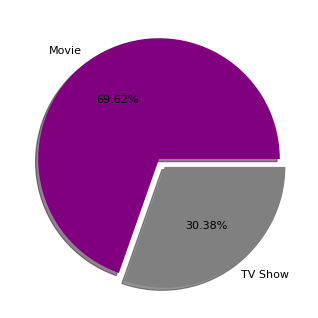

In [8]:
fig,ax = plt.subplots(figsize=(5,5),dpi=80)
c = file['type'].value_counts()
labels = c.index
explode = (0, 0.08)
colors=["purple","gray"]
ax.pie(c.values, explode=explode, colors=colors,labels=labels, shadow=True, autopct='%1.2f%%')
plt.show()

In [9]:
file_country=Counter(file['country'])
file_country=file.country.value_counts().head(15)
file_country

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Indonesia           79
Name: country, dtype: int64

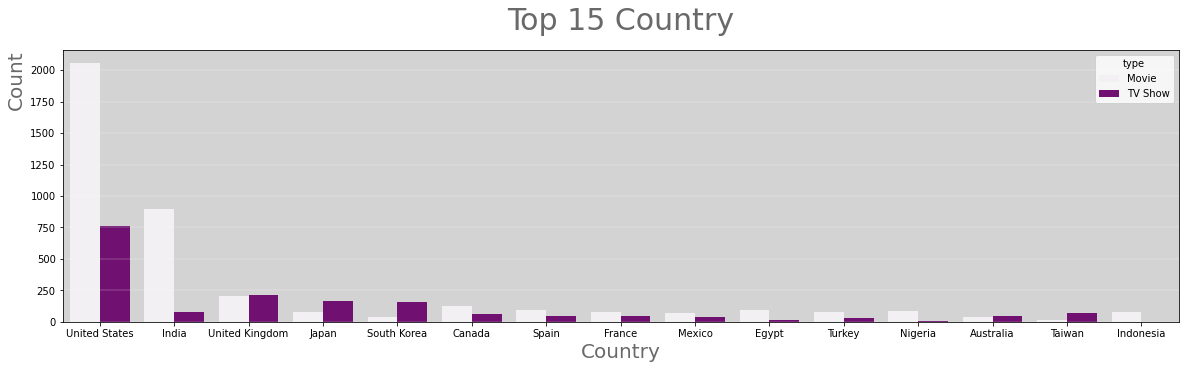

In [10]:
plt.subplots(figsize= (20,5))
sns.countplot(x= file.country, order= file_country.index, hue= file.type,color="purple")
plt.title('Top 15 Country',color="dimgrey", fontsize= 30,pad=20,fontname="Comic Sans MS")
plt.xlabel("Country",fontsize=20,color="dimgrey",loc="center",fontname="Comic Sans MS")
plt.ylabel("Count",fontsize=20,color="dimgrey",loc="top",fontname="Comic Sans MS")
plt.grid(linestyle="-",linewidth=0.25,axis="y",color="white")
gca=plt.gca()
gca.set_facecolor("lightgrey")

In [11]:
file_year=Counter(file['release_year'])
file.release_year.value_counts().head(10)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

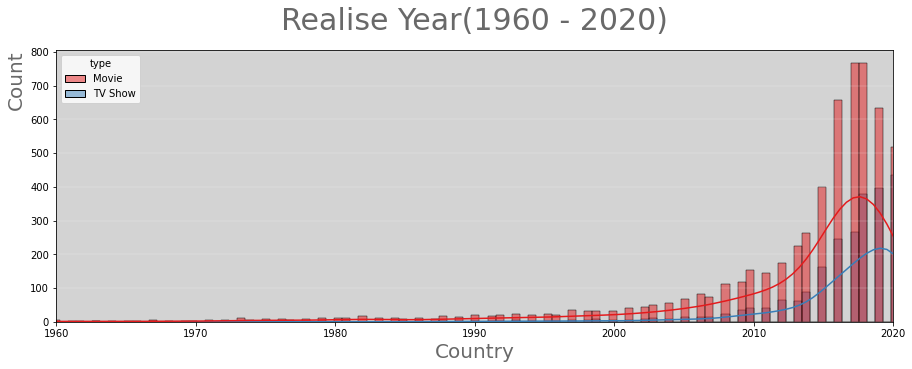

In [12]:
plt.figure(figsize=(15,5))
ax=sns.histplot(x= file.release_year,hue=file.type,kde=True,palette="Set1")
plt.xlim(1960,2020)
plt.title('Realise Year(1960 - 2020)',color="dimgrey", fontsize= 30,pad=20,fontname="Comic Sans MS")
plt.xlabel("Country",fontsize=20,color="dimgrey",loc="center",fontname="Comic Sans MS")
plt.ylabel("Count",fontsize=20,color="dimgrey",loc="top",fontname="Comic Sans MS")
plt.grid(linestyle="-",linewidth=0.2,axis="y",color="white")
gca=plt.gca()
gca.set_facecolor("lightgrey")

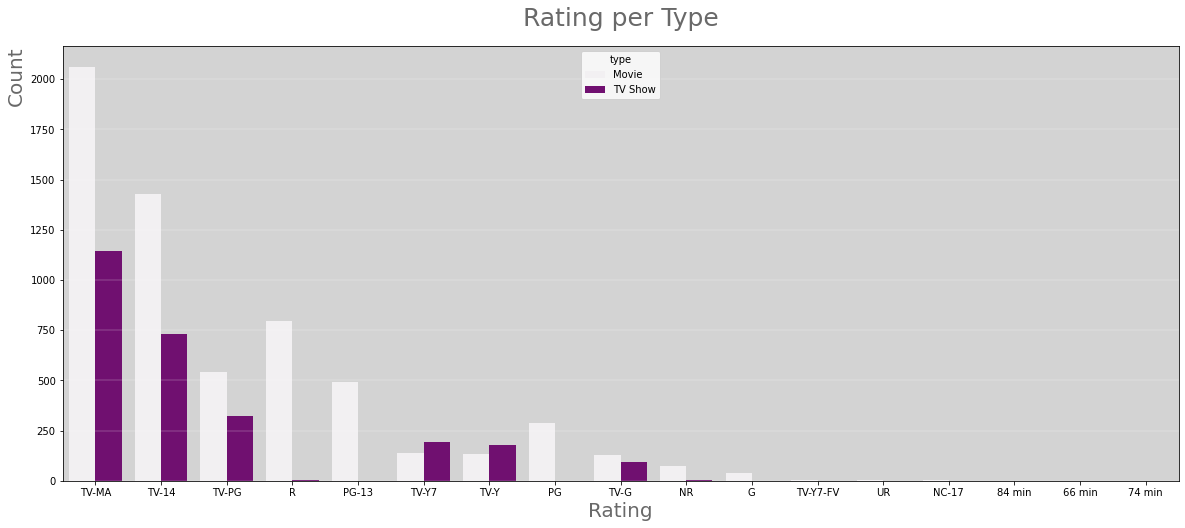

In [13]:
plt.subplots(figsize= (20,8))
sns.countplot(x=file.rating, order= file.rating.value_counts().index, hue= file.type,color="purple")
plt.title('Rating per Type', fontsize= 25,color="dimgrey",pad=20,fontname="Comic Sans MS")
plt.xlabel("Rating",fontsize=20,color="dimgrey",loc="center",fontname="Comic Sans MS")
plt.ylabel("Count",fontsize=20,color="dimgrey",loc="top",fontname="Comic Sans MS")
plt.grid(linestyle="-",linewidth=0.25,axis="y",color="white")
gca=plt.gca()
gca.set_facecolor("lightgrey")

Text(0.5, 1.0, 'TV Show Top(15)')

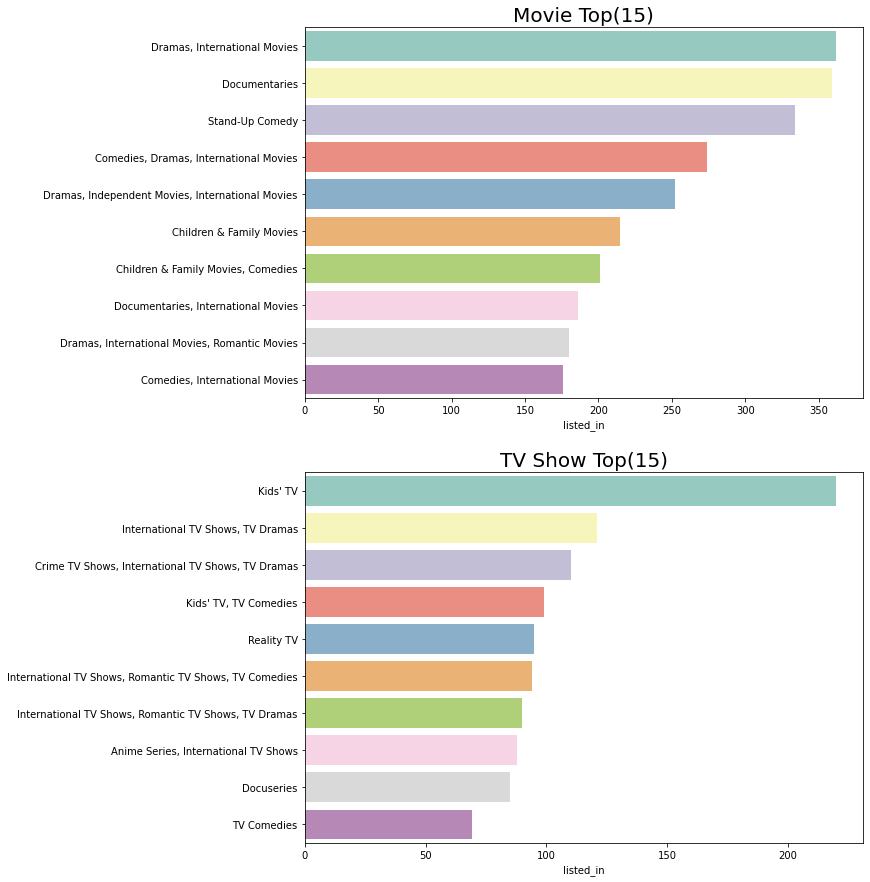

In [14]:
file_movie = file[file['type']=='Movie']
file_show = file[file['type']=='TV Show']
figur= plt.figure(figsize= (10,15))

figur.add_subplot(2,1,1)
sns.barplot(x= file_movie.listed_in.value_counts().head(10), palette="Set3",y= file_movie.listed_in.value_counts().head(10).index)
plt.title('Movie Top(15)', fontsize= 20)

figur.add_subplot(2,1,2)
sns.barplot(x= file_show.listed_in.value_counts().head(10), palette="Set3", y= file_show.listed_in.value_counts().head(10).index)
plt.title('TV Show Top(15)', fontsize= 20)

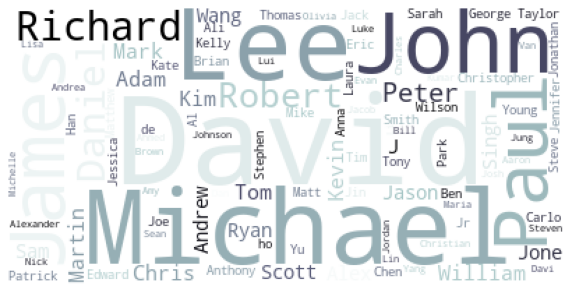

In [15]:
from wordcloud import WordCloud, STOPWORDS

file_cast=file['cast']
text = list(set(file_cast))
plt.rcParams['figure.figsize'] = (10,10)

wordcloud = WordCloud(background_color = 'white',colormap='bone', max_words = 100).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

